<a href="https://colab.research.google.com/github/daphnecor/Computational_neuroscience/blob/main/Comp_neuro_exercises_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Neuroscience
## Exercises week 2 (nonlinear dynamics 2)

In [ ]:
# @title Dependencies
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from pylab import *
import numpy as np
import math
from scipy.integrate import odeint
import seaborn
from sympy import symbols, Eq, solve

 cmap = ['red', 'darkred', 'dodgerblue', 'lightblue', 'olive', 'gold', 'silver']

## Question 1.  Analytical and numerical analysis of system behaviour

### 1a) Sketch the trajectories, indicate stability of fixed points

We have the following system of differential equations

$$
\dot x_1 = -x_2 + x_2^3\\
\dot x_2 = -x_1 + x_1^3\\
$$

We first find the fixed points by solving for $x_1$ and $x_2$ when $\dot x_1$ and $\dot x_2$ are 0, and then determine their stability by evaluating the Jacobian at the fixed points. The trace and determinant of the Jacobian are indicative of the stability of the fixed point. 

$$
\dot x_1 = 0 \Rightarrow x_2(x^2 - 1) = 0  \\
x_2 = 0 \vee x_2 ± 1\\
$$

similarly, for $\dot x_1$:

$$
\dot x_2 = 0 \Rightarrow x_1(x^1 - 1) = 0  \\
x_1 = 0 \vee x_1 ± 1\\
$$

gives the following FP's
$$
\{ (-1, -1), (-1,0), (0,-1), (0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1) \}
$$


To asses the stability of the FP's for 

$$
\dot x_1 = f(x_1, x_2) \\
\dot x_2 = g(x_1, x_2)
$$

analytically, we use the Jacobian

$$
\mathbf{J} = 
\begin{pmatrix}
\frac{\partial f}{\partial x_1} &
\frac{\partial f}{\partial x_2} \\
\frac{\partial g}{\partial x_1} &
\frac{\partial g}{\partial x_2}
\end{pmatrix} 
= \begin{pmatrix}
0 &  -1 + 3x_2^2\\
-1 + 3x_1^2 &  0\\
\end{pmatrix}
$$

and see that $\tau$ = Tr$[\mathbf{J}] = 0$ and $\Delta = -(-1+3x^2)(-1+3x^2)$. 

We conclude the following

- The FP's are centers when Tr$[\mathbf{J}] = 0$ and $\det[\mathbf{J}] > 0$
- The FP's are saddle points when Tr$[\mathbf{J}] = 0$ and $\det[\mathbf{J}] < 0$


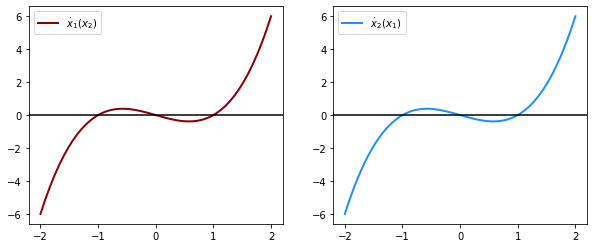

In [ ]:
# @title Plotting both DE's as a function of their inputs.
#@markdown The fixed points are the points where the derivatives cross the x-axis 
#@markdown and are in line with the FP's found analytically.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

x_range = linspace(-2, 2, 51)
xdot = lambda x: -x + x**3

ax1.plot(x_range, xdot(x_range), color=cmap[1], linewidth = 2, label=r'$\dot x_1(x_2)$')
ax1.axhline(y=0, c='k')
ax1.legend()

ax2.plot(x_range, xdot(x_range), color=cmap[2], linewidth = 2, label=r'$\dot x_2(x_1)$')
ax2.axhline(y=0, c='k');
ax2.legend();

In [ ]:
def system1a(t, V):
  '''
  t: independent variable

  V: 2D vector containing system of first order DE's
  '''
  x1, x2 = V 
  return [-x2 + x2**3, -x1 + x1**3]

t_range = np.linspace(0, 50, 1000)                                        # interval of integration (t0, tf)
x1_mesh, x2_mesh = meshgrid(arange(-2, 2, 0.1), arange(-2, 2, 0.1))   

fx1x2 = lambda x2: -x2 + x2**3                                            # phase space
gx1x2 = lambda x1: -x1 + x1**3                                            # define DE's
x1_dot = fx1x2(x2_mesh)
x2_dot = gx1x2(x1_mesh)

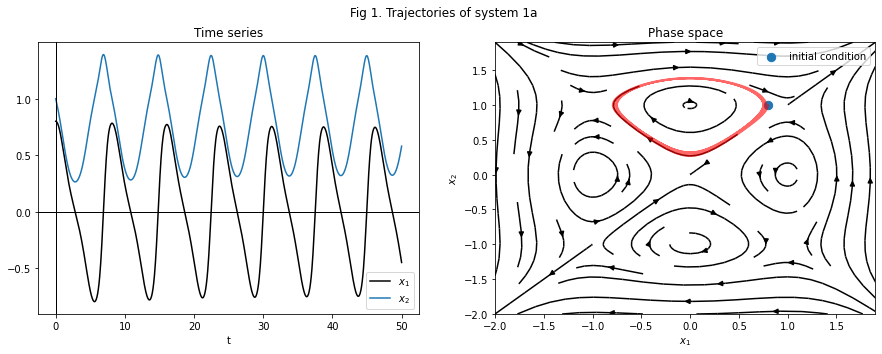

In [ ]:
#@title Trajectories in phase space 
X1_0 =  0.8#@param {type:"number"}
X2_0 =  1#@param {type:"number"}

# initial conditions 
X0 = [X1_0, X2_0]

# solve initial value problem 
sol = solve_ivp(system1a, t_span=[min(t_range), max(t_range)], y0=X0, t_eval=t_range)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Fig 1. Trajectories of system 1a');
ax1.set_title('Time series')
ax1.plot(sol.t, sol.y[0], 'k-', label=r'$x_1$');
ax1.plot(sol.t, sol.y[1], '-', label=r'$x_2$');
ax1.axvline(x=0, color='k', linestyle='-', lw=1)
ax1.axhline(y=0, color='k', linestyle='-', lw=1)
ax1.set_xlabel('t')
ax1.legend()

ax2.set_title('Phase space')
ax2.plot(sol.y[0], sol.y[1], alpha = .6, color=cmap[0]);
ax2.streamplot(x1_mesh, x2_mesh, x1_dot, x2_dot, density=0.6, color='k')
ax2.scatter(X0[0], X0[1] , s=70, zorder=2, label='initial condition') # z order determines order of plotting
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.legend();

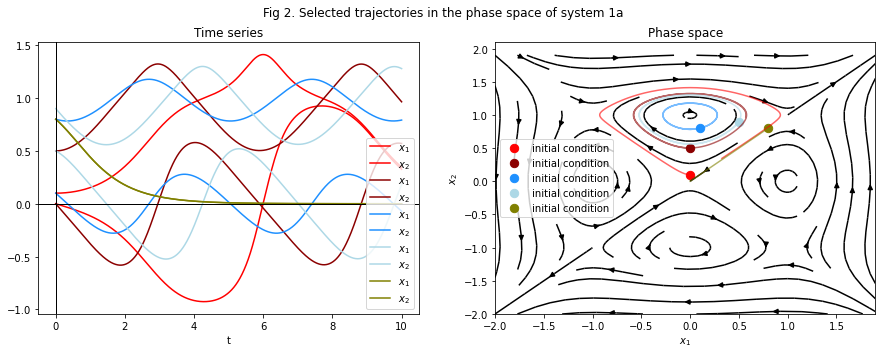

In [ ]:
#@title Selected trajectories in phase space 

initial_conds = [[0, 0.1], [0, 0.5], [0.1,0.8],  [0.5,0.9],  [0.8,0.8]]

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Fig 2. Selected trajectories in the phase space of system 1a');
ax1.set_title('Time series')

for i in range(len(initial_conds)):

  # solve initial value problem 
  sol = solve_ivp(system1a, t_span=[min(t_range), max(t_range)], y0=initial_conds[i], t_eval=t_range)

  ax1.plot(sol.t, sol.y[0], 'k-', label=r'$x_1$', color=cmap[i]);
  ax1.plot(sol.t, sol.y[1], '-', label=r'$x_2$', color=cmap[i]);
  ax1.axvline(x=0, color='k', linestyle='-', lw=1)
  ax1.axhline(y=0, color='k', linestyle='-', lw=1)
  ax1.set_xlabel('t')
  ax1.legend()

  ax2.plot(sol.y[0], sol.y[1], alpha = .6, color=cmap[i]);
  ax2.scatter(initial_conds[i][0], initial_conds[i][1] , 
              s=70, color=cmap[i], zorder=2, label='initial condition') # z order determines order of plotting

ax1.axvline(x=0, color='k', linestyle='-', lw=1)
ax1.axhline(y=0, color='k', linestyle='-', lw=1)
ax1.set_xlabel('t')

ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.set_title('Phase space')
ax2.streamplot(x1_mesh, x2_mesh, x1_dot, x2_dot, density=0.6, color='k')
ax2.legend();

### 1b) Find the two centers of the system of DE's analytically

We have the following system of differential equations

$$
\dot x_1 = 2x_1x_2\\
\dot x_2 = \frac{1}{4} - x_1^2 + x_2^2 \\
$$

we first find the nullclines by evaluating $\dot x_1, \dot x_2 = 0$. The fixed points are the points where the nullclines intersect, so:

$$
\dot x_1 = 2x_1x_2 = 0 \\
x_1 = 0 \,  \vee x_2 = 0
$$

and 

$$
\dot x_2 = \frac{1}{4} - x_1^2 + x_2^2 = 0 \\
$$

giving the fixed points

$$
(x_1^*, x_2^*) = \{ \left(0, \sqrt{-\frac{1}{4}} \right), 
                \left(0, -\sqrt{-\frac{1}{4}} \right)), 
            \left(-\frac{1}{2}, 0 \right), 
            \left(\frac{1}{2}, 0) \right) \}
$$

To asses the stability of the FP's for 

$$
\dot x_1 = f(x_1, x_2) \\
\dot x_2 = g(x_1, x_2)
$$

we evaluate the Jacobian,

$$
\mathbf{J} = 
\begin{pmatrix}
\frac{\partial f}{\partial x_1} &
\frac{\partial f}{\partial x_2} \\
\frac{\partial g}{\partial x_1} &
\frac{\partial g}{\partial x_2}
\end{pmatrix} 
= \begin{pmatrix}
2x_2 &  2x_1   \\
-2x_1 & 2x_2   \\
\end{pmatrix}
$$

at the fixed points, $\mathbf{J}_{(x_1^*, x_2^*)}$.  

and see that 

$$
\tau = \text{Tr}[\mathbf{J}] = (2x_2)(2x_2) = 4x_2^2
$$

$$
\Delta = \det[\mathbf{J}] = (4x_2^2) - (-4x_1^2) = 4x_2^2 + 4x_1^2
$$

A **center** occurs when $\text{Tr}[\mathbf{J}]=0$ and $\det[\mathbf{J}]>0$ so the FP's

$$
(x_1^*, x_2^*) = \{ \left(-\frac{1}{2}, 0 \right), \left(\frac{1}{2}, 0 \right) \}
$$

are centers




### Qualitative exploration, identify the centers

In [ ]:
def system1b(t, V):
  '''
  t: independent variable

  V: 2D vector containing system of first order DE's
  '''
  x1, x2 = V 
  return [2*x1*x2, 1/4 - x1**2 + x2**2]

t_range = np.linspace(0, 100, 1000)                                       # interval of integration (t0, tf)
x1_mesh, x2_mesh = meshgrid(arange(-5, 5, 0.1), arange(-5, 5, 0.1))       # phase space

# define DE's
fx1x2 = lambda x1, x2: 2*x1*x2                                       
gx1x2 = lambda x1, x2: 1/4 - x1**2 + x2**2            
# insert grid of values to get vector field               
x1_dot = fx1x2(x1_mesh, x2_mesh)
x2_dot = gx1x2(x1_mesh, x2_mesh)

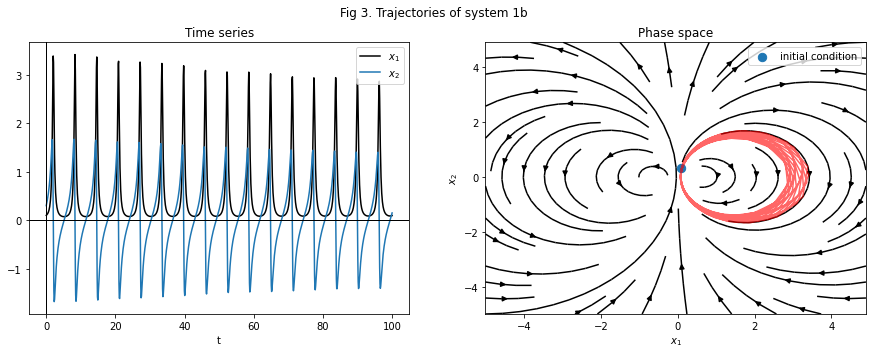

In [ ]:
#@title Trajectories in phase space 
X1_0 =  0.1#@param {type:"number"}
X2_0 =  0.3#@param {type:"number"}

# initial conditions 
X0 = [X1_0, X2_0]

# solve initial value problem 
sol = solve_ivp(system1b, t_span=[min(t_range), max(t_range)], y0=X0, t_eval=t_range)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Fig 3. Trajectories of system 1b');
ax1.set_title('Time series')
ax1.plot(sol.t, sol.y[0], 'k-', label=r'$x_1$');
ax1.plot(sol.t, sol.y[1], '-', label=r'$x_2$');
ax1.axvline(x=0, color='k', linestyle='-', lw=1)
ax1.axhline(y=0, color='k', linestyle='-', lw=1)
ax1.set_xlabel('t')
ax1.legend()

ax2.set_title('Phase space')
ax2.plot(sol.y[0], sol.y[1], alpha = .6, color=cmap[0]);
ax2.streamplot(x1_mesh, x2_mesh, x1_dot, x2_dot, density=0.6, color='k')
ax2.scatter(X0[0], X0[1] , s=70, zorder=2, label='initial condition') # z order determines order of plotting
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.legend();

### 1c) Number of fixed points, location and stability while varying $a$

We have the following system of differential equations

$$
\dot x_1 = x_2 + x_1x_2 + ax_1x_2^2 \\
\dot x_2 = -x_1 -x_1^2 + x_2^2
$$

we first find the nullclines by evaluating $\dot x_1, \dot x_2 = 0$. The fixed points are the points where the nullclines intersect, so:

$$
\dot x_1 = x_2 + x_1x_2 + ax_1x_2^2 = 0 \\ 
\Rightarrow x_2(1 + x_1 + a x_1 x_2) = 0 \\
$$

$$
x_2 = 0 \qquad \vee \qquad (1 + x_1 + a x_1 x_2) = 0 \\
1 + x_1 + a x_1 x_2 = 0 \\
ax_2 =  -\frac{1}{x_1} - 1 \\
x_2 = - \frac{1}{a} \left( \frac{1}{x_1} + 1 \right)
$$

and 

$$
\dot x_2 = -x_1 -x_1^2 + x_2^2 = 0 \\
x_2^2 = x_1 + x_1^2 \\
x_2 = ± \sqrt{x_1 + x_1^2} 
$$

<!-- giving the FP’s

$$
$$

To asses the stability of the FP's for 

$$
\dot x_1 = f(x_1, x_2) \\
\dot x_2 = g(x_1, x_2)
$$

we evaluate the Jacobian,

$$
\mathbf{J} = 
\begin{pmatrix}
\frac{\partial f}{\partial x_1} &
\frac{\partial f}{\partial x_2} \\
\frac{\partial g}{\partial x_1} &
\frac{\partial g}{\partial x_2}
\end{pmatrix} 
= \begin{pmatrix}
&     \\
&    \\
\end{pmatrix}
$$

at the fixed points, $\mathbf{J}_{(x_1^*, x_2^*)}$.  

and see that 

$$
\tau = \text{Tr}[\mathbf{J}] = 
$$

$$
\Delta = \det[\mathbf{J}] = 
$$
 -->


### Qualitative explorations

In [ ]:
def system1c(t, V, a=1):
  '''
  t: independent variable

  V: 2D vector containing system of first order DE's
  '''
  x1, x2 = V 
  return [x2 + x1 * x2 + a * x1 * x2**2, -x1 - x1**2 + x2**2]

t_range = np.linspace(0, 100, 1000)                                       # interval of integration (t0, tf)
x1_mesh, x2_mesh = meshgrid(arange(-12, 12, 0.1), arange(-12, 12, 0.1))       # phase space

# define DE's
fx1x2 = lambda x1, x2, a: x2 + x1 * x2 + a * x1 * x2**2                                      
gx1x2 = lambda x1, x2: -x1 - x1**2 + x2**2
# insert grid of values to get vector field               
x1_dot = fx1x2(x1_mesh, x2_mesh, 1)
x2_dot = gx1x2(x1_mesh, x2_mesh)

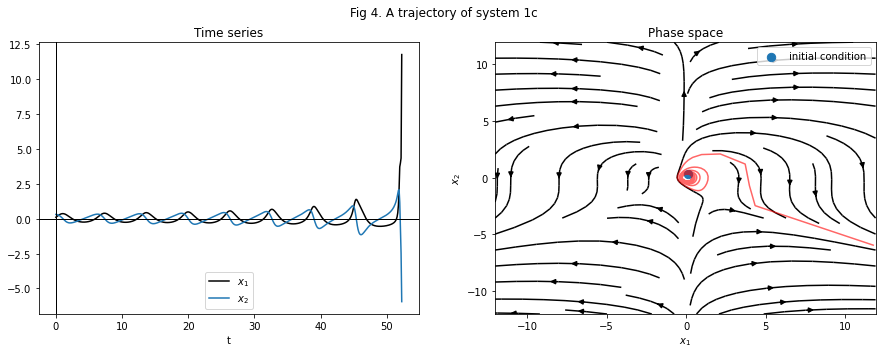

In [ ]:
#@title Trajectories in phase space 
X1_0 =  0.1#@param {type:"number"}
X2_0 =  0.3#@param {type:"number"}

# initial conditions 
X0 = [X1_0, X2_0]

# solve initial value problem 
sol = solve_ivp(system1c, t_span=[min(t_range), max(t_range)], y0=X0, t_eval=t_range)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Fig 4. A trajectory of system 1c');
ax1.set_title('Time series')
ax1.plot(sol.t, sol.y[0], 'k-', label=r'$x_1$');
ax1.plot(sol.t, sol.y[1], '-', label=r'$x_2$');
ax1.axvline(x=0, color='k', linestyle='-', lw=1)
ax1.axhline(y=0, color='k', linestyle='-', lw=1)
ax1.set_xlabel('t')
ax1.legend()

ax2.set_title('Phase space')
ax2.plot(sol.y[0], sol.y[1], alpha = .6, color=cmap[0]);
ax2.streamplot(x1_mesh, x2_mesh, x1_dot, x2_dot, density=0.6, color='k')
ax2.scatter(X0[0], X0[1] , s=70, zorder=2, label='initial condition') # z order determines order of plotting
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.legend();

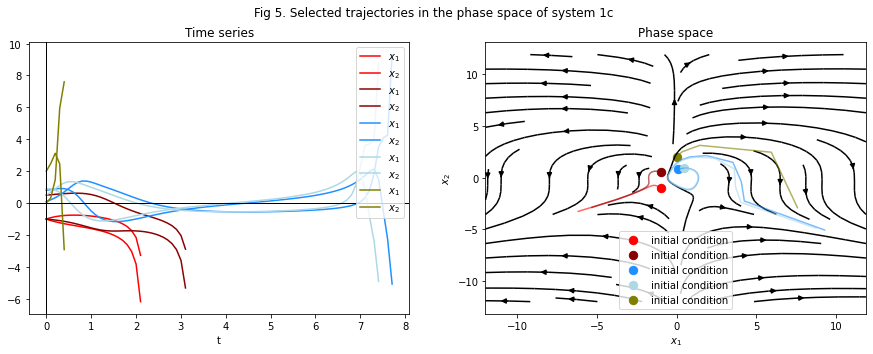

In [ ]:
#@title Selected trajectories in phase space 
initial_conds = [[-1, -1], [-1, 0.5], [0.1,0.8],  [0.5,0.9], [0, 2]]

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Fig 5. Selected trajectories in the phase space of system 1c');
ax1.set_title('Time series')

for i in range(len(initial_conds)):

  # solve initial value problem 
  sol = solve_ivp(system1c, t_span=[min(t_range), max(t_range)], y0=initial_conds[i], t_eval=t_range)

  ax1.plot(sol.t, sol.y[0], 'k-', label=r'$x_1$', color=cmap[i]);
  ax1.plot(sol.t, sol.y[1], '-', label=r'$x_2$', color=cmap[i]);
  ax1.axvline(x=0, color='k', linestyle='-', lw=1)
  ax1.axhline(y=0, color='k', linestyle='-', lw=1)
  ax1.set_xlabel('t')
  ax1.legend()

  ax2.plot(sol.y[0], sol.y[1], alpha = .6, color=cmap[i]);
  ax2.scatter(initial_conds[i][0], initial_conds[i][1] , 
              s=70, color=cmap[i], zorder=2, label='initial condition') # z order determines order of plotting

ax1.axvline(x=0, color='k', linestyle='-', lw=1)
ax1.axhline(y=0, color='k', linestyle='-', lw=1)
ax1.set_xlabel('t')

ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.set_title('Phase space')
ax2.streamplot(x1_mesh, x2_mesh, x1_dot, x2_dot, density=0.6, color='k')
ax2.legend();

## Question 2. Van der Pol oscillator

We have the following differential equation

$$
\ddot x + c\dot x (x^2−1) + \omega^2 x=0
$$ 

which we can convert to a system of first order DE's

$$
x_1 = x \\
x_2 = \dot x
$$

and obtain

$$
\dot x_1 = x_2 \\
\dot x_2 = -c(x_1^2 − 1)x_2 - \omega^2 x_1
$$

we first calculate the nullclines $\dot x_1, \dot x_2 = 0$:

$$
\dot x_1 = 0 \rightarrow x_2 = 0 \\
$$

$$
\dot x_2 = 0 \rightarrow
c(x_1^2 − 1)x_2 + \omega^2 x_1 = 0 \\
c(x_1^2 − 1)x_2 = - \omega^2 x_1 \\
x_2 = - \frac{\omega^2}{c} \frac{x_1}{x_1^2 − 1} 
= - \frac{\omega^2}{c} \frac{x_1}{(x_1 + 1)(x_1 - 1)}
$$

so the nullclines are

$$
\dot x_1=0 \qquad \text{ if } \qquad \qquad \qquad x_2 = 0 \\
\qquad \dot x_2=0 \qquad \text{ if } \qquad - \frac{\omega^2}{c} \frac{x_1}{(x_1 + 1)(x_1 - 1)} = 0
$$

To asses the stability of the FP's for 

$$
\dot x_1 = f(x_1, x_2) \\
\dot x_2 = g(x_1, x_2)
$$

we look at the trace and determinant of the Jacobian

$$
\mathbf{J} = 
\begin{pmatrix}
\frac{\partial f}{\partial x_1} &
\frac{\partial f}{\partial x_2} \\
\frac{\partial g}{\partial x_1} &
\frac{\partial g}{\partial x_2}
\end{pmatrix} 
= \begin{pmatrix}
0 &  1  \\
-2 c x_1 x_2 - \omega^2 &  - c (x_1^2 - 1)  \\
\end{pmatrix}
$$

<!-- at the fixed points, $\mathbf{J}_{(x_1^*, x_2^*)}$.   -->

$$
\tau = \text{Tr}[\mathbf{J}] = - c (x_1^2 - 1)
$$

$$
\Delta = \det[\mathbf{J}] = - c (x_1^2 - 1) - (-2 c x_1 x_2 - \omega^2) \\
=  - c (x_1^2 - 1) + 2 c x_1 x_2 + \omega^2
$$

A **limit cycle** is an isolated periodic solution and occurs when $\tau =0$ and $\Delta > 0$ so it looks like there is a limit cycle at the origin $(x_1, x_2)=(0,0)$


In [ ]:
def system2a(t, V, omega, c):
  '''
  t: independent variable

  V: 2D vector containing system of first order DE's
  '''
  x1, x2 = V 
  return [x2, -c * (x1**2 - 1) * x2 - omega**2 * x1]

t_range = np.linspace(0, 100, 1000)                                   # interval of integration (t0, tf)
x1_mesh, x2_mesh = meshgrid(arange(-5, 5, 0.1), arange(-5, 5, 0.1))   # phase space

# define DE's
fx1x2 = lambda x1, x2: x2                               
gx1x2 = lambda x1, x2, omega, c: -c * (x1**2 - 1) * x2 - omega**2 * x1
# insert grid of values to get vector field               
x1_dot = fx1x2(x1_mesh, x2_mesh)
x2_dot = gx1x2(x1_mesh, x2_mesh, 1, 1)

In [ ]:
# import sympy as sm
# x1, x2 = sm.symbols('x1, x2', negative=False)
# N1 = x2
# N2 = -1*(x1**2 - 1) * x2 - 1**2 * x1

# # use sympy's way of setting equations to zero
# N1Equal = sm.Eq(N1, 0)
# N2Equal= sm.Eq(N2, 0)

# # compute fixed points
# equilibria = sm.solve((N1Equal, N2Equal), x1, x2)
# print(equilibria)

# nullclinex1 = sm.solve(N1Equal)
# nullclinex2 = sm.solve(N2Equal)

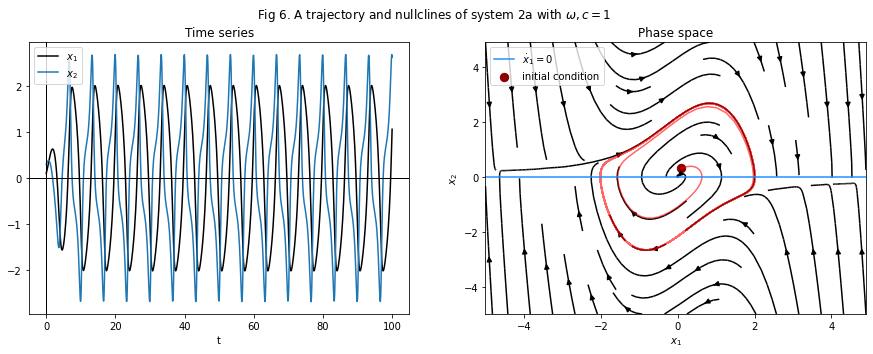

In [ ]:
#@title A trajectory in phase space and nullclines
X1_0 =  0.1#@param {type:"number"}
X2_0 =  0.3#@param {type:"number"}

# initial conditions 
X0 = [X1_0, X2_0]

# solve initial value problem 
sol = solve_ivp(system2a, t_span=[min(t_range), max(t_range)], y0=X0, t_eval=t_range, args=(1,1))

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle(r'Fig 6. A trajectory and nullclines of system 2a with $\omega,c=1$');
ax1.set_title('Time series')
ax1.plot(sol.t, sol.y[0], 'k-', label=r'$x_1$');
ax1.plot(sol.t, sol.y[1], '-', label=r'$x_2$');
ax1.axvline(x=0, color='k', linestyle='-', lw=1)
ax1.axhline(y=0, color='k', linestyle='-', lw=1)
ax1.set_xlabel('t')
ax1.legend()

ax2.set_title('Phase space')
ax2.plot(sol.y[0], sol.y[1], alpha = .6, color=cmap[0]);
ax2.streamplot(x1_mesh, x2_mesh, x1_dot, x2_dot, density=0.6, color='k')
ax2.scatter(X0[0], X0[1] , s=70, color=cmap[1], zorder=2, label='initial condition') # z order determines order of plotting
ax2.axhline(y=0, color=cmap[2], label=r'$\dot x_1=0$')
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.legend();

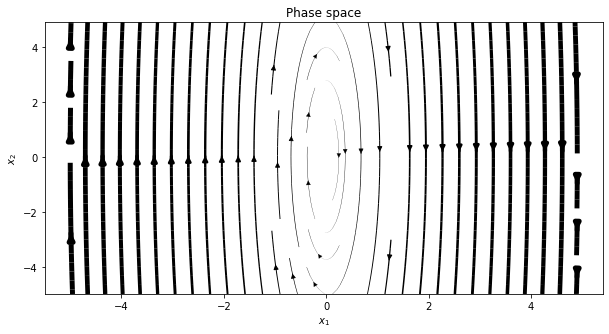

In [ ]:
#@title How the parameters c and omega change the phase space
c = 0 #@param {type:"slider", min:-10, max:10, step:0.5}
omega = 7.5 #@param {type:"slider", min:-10, max:10, step:0.5}

x1_dot = fx1x2(x1_mesh, x2_mesh)
x2_dot = gx1x2(x1_mesh, x2_mesh, omega, c)

speed = np.sqrt(x1_dot**2 + x2_dot**2)
lw = 5*speed / speed.max()
# figure
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set_title('Phase space')
ax.streamplot(x1_mesh, x2_mesh, x1_dot, x2_dot, color='k', linewidth=lw)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$');

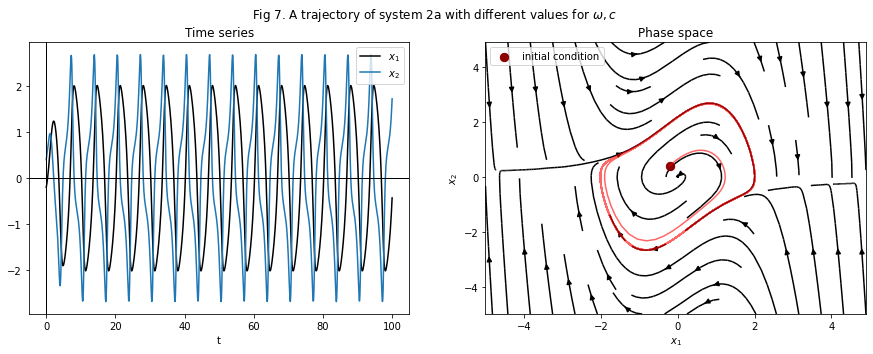

In [ ]:
X1_0 =  -0.2#@param {type:"slider", min:-2, max:2, step:0.3}
X2_0 =  0.4#@param {type:"slider", min:-2, max:2, step:0.2}
omega = 1 #@param {type:"slider", min:-5, max:5, step:0.5}
c = 1#@param {type:"slider", min:-5, max:5, step:0.5}

# insert grid of values to get vector field               
x1_dot = fx1x2(x1_mesh, x2_mesh)
x2_dot = gx1x2(x1_mesh, x2_mesh, omega, c)

# initial conditions 
X0 = [X1_0, X2_0]

# solve initial value problem 
sol = solve_ivp(system2a, t_span=[min(t_range), max(t_range)], y0=X0, t_eval=t_range, args=(omega, c))

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle(r'Fig 7. A trajectory of system 2a with different values for $\omega, c$');
ax1.set_title('Time series')
ax1.plot(sol.t, sol.y[0], 'k-', label=r'$x_1$');
ax1.plot(sol.t, sol.y[1], '-', label=r'$x_2$');
ax1.axvline(x=0, color='k', linestyle='-', lw=1)
ax1.axhline(y=0, color='k', linestyle='-', lw=1)
ax1.set_xlabel('t')
ax1.legend()

ax2.set_title('Phase space')
ax2.plot(sol.y[0], sol.y[1], alpha = .6, color=cmap[0]);
ax2.streamplot(x1_mesh, x2_mesh, x1_dot, x2_dot, density=0.6, color='k')
ax2.scatter(X0[0], X0[1] , s=70, color=cmap[1], zorder=2, label='initial condition') # z order determines order of plotting
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.legend();

---

In conclusion, 



- The amplitude of the oscillations is determined by $c$ and $\omega$
- The frequency of the oscillations is determined by ?
- The duration of the transient towards the stable limit cycle is determined by the initial conditions


## Question 3. Hopf bifurcation

### System 1



We have the system 

$$
\dot r = r(c - r^2) \\
\dot \theta = 2 \pi
$$

we first find the nullclines by evaluating $\dot r = 0$ (as $\dot \theta = 2 \pi$ this can never be zero). The fixed points are the points where the nullclines intersect.

$$
\dot r = 0 \rightarrow r(c - r^2) = 0 \\
r = 0 \qquad \vee \qquad r = ± \sqrt{c}
$$

FP's

$$
\{(0, \sqrt{c}), () \}
$$

---

Thus, when $c>0$, this system has a limit cycle. 

$$
\frac{d \dot r}{dr} = r' (c-r^2) + r (c-r^2)' \\
= c-r^2 - 2r^2 \\
= c - 3r^2
$$



### System 2 




We have the system 

$$
\dot r = r(c + 2r^2 - r^4) \\
\dot \theta = 2 \pi
$$

let's find the nullclines

$$
\dot r = 0 \rightarrow r(c + 2r^2 - r^4) = 0 \\
2r^2 - r^4 + c = 0 \\
r^2 = \frac{-2 ± \sqrt{4+4c}}{-2} \\
= 1 ± \sqrt{1+c}
$$

In [ ]:
def system3one(V, t, c):
  '''
  t: independent variable

  V: 2D vector containing system of first order DE's
  '''
  r, theta = V
  return [r*(c - r**2), 2*np.pi]

def system3two(V, t, c):
  '''
  t: independent variable

  V: 2D vector containing system of first order DE's
  '''
  r, theta = V
  return [r*(c + 2*r**2 -r**4), 2*np.pi]

# t_range = np.linspace(0, 100, 1000)                                   # interval of integration (t0, tf)
# r_mesh, x2_mesh = meshgrid(arange(-5, 5, 0.1), arange(-5, 5, 0.1))   # phase space

# # define DE's
# fx1x2 = lambda x1, x2: x2                               
# gx1x2 = lambda x1, x2, omega, c: -c * (x1**2 - 1) * x2 - omega**2 * x1
# # insert grid of values to get vector field               
# x1_dot = fx1x2(x1_mesh, x2_mesh)
# x2_dot = gx1x2(x1_mesh, x2_mesh, 1, 1)

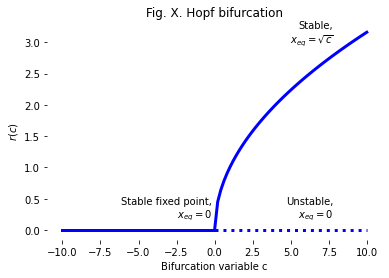

In [ ]:
#@title Bifurcation diagram system 1 as a function of c

def sol1(c = 1): # returns the x-value for a range of c-values (bifurcation variable)
  return np.sqrt(c)

def sol2(): # second x solution
  return 0

domain1 = linspace(0,10)
domain2 = linspace(-10, 0)


plt.plot(domain1, sol1(domain1), color = 'b', lw=3, linestyle = "solid")
plt.text(7.8,3, ("Stable,\n " + r"$x_{eq} = \sqrt{c}$") ,horizontalalignment='right')
plt.plot(domain1, np.repeat(sol2(), len(domain1)), linestyle = "dotted", color='b', lw=3)
plt.text(-0.2, 0.2, ("Stable fixed point,\n " + r"$x_{eq} = 0$") ,horizontalalignment='right')

plt.plot(domain2, np.repeat(sol2(), len(domain2)), linestyle = "solid", color='b', lw=3)
plt.text(7.8, 0.2, ("Unstable,\n " + r"$x_{eq} = 0$") ,horizontalalignment='right')
plt.xlabel('Bifurcation variable c')
plt.ylabel(r'$r(c)$')
plt.title('Fig. X. Hopf bifurcation')
seaborn.despine(left=True, bottom=True, right=True) # remove plot box

In [ ]:
# bifurcation diagram system 2 as a function of c

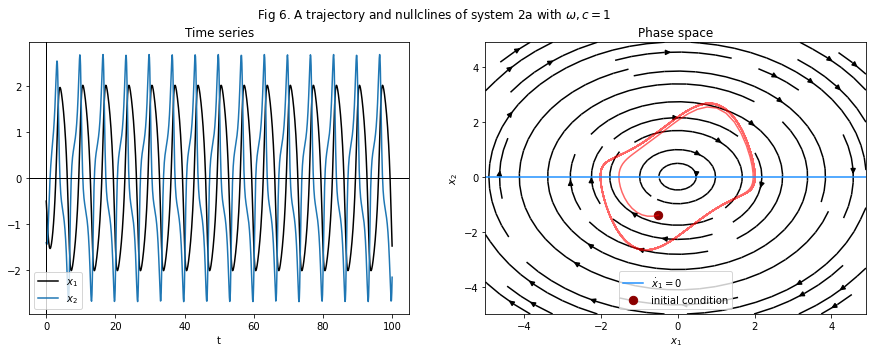

In [ ]:
#@title A trajectory in phase space and nullclines
r =  0.1#@param {type:"number"}
theta =  0.3#@param {type:"number"}

# initial conditions 
X0 = [X1_0, X2_0]

# solve initial value problem 
sol = solve_ivp(system2a, t_span=[min(t_range), max(t_range)], y0=X0, t_eval=t_range, args=(1,1))

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle(r'Fig 6. A trajectory and nullclines of system 2a with $\omega,c=1$');
ax1.set_title('Time series')
ax1.plot(sol.t, sol.y[0], 'k-', label=r'$x_1$');
ax1.plot(sol.t, sol.y[1], '-', label=r'$x_2$');
ax1.axvline(x=0, color='k', linestyle='-', lw=1)
ax1.axhline(y=0, color='k', linestyle='-', lw=1)
ax1.set_xlabel('t')
ax1.legend()

ax2.set_title('Phase space')
ax2.plot(sol.y[0], sol.y[1], alpha = .6, color=cmap[0]);
ax2.streamplot(x1_mesh, x2_mesh, x1_dot, x2_dot, density=0.6, color='k')
ax2.scatter(X0[0], X0[1] , s=70, color=cmap[1], zorder=2, label='initial condition') # z order determines order of plotting
ax2.axhline(y=0, color=cmap[2], label=r'$\dot x_1=0$')
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.legend();